In [2]:
#External Packages
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import copy 
from numpy.random import randint
from fractions import Fraction

In [3]:
# qbit Class
# it creates a qbit in the |0> state. 
# Properties
# state: gives an array with the amplitude of the state |1> and |0> respectively 
class qbit:
    def __init__(self,state:list[complex]=[1,0]):
        self.state = np.array(state,dtype=complex)    

In [4]:
# Quantum Register Class
# it creates a quantum register of n (length) qbits  all in the state |0>. 
# Properties
# length= number of qbit in the quantum register (type:int)
# tensor= state vector of que the quantum register (type:array)

class quantum_reg:    
    def __init__(self,length:int):
        self.length=length
        qb_array=[]
        for i in range (length):
            qb_array.append(qbit())
        self.qb_array=np.array(qb_array)
        self.tensor_prod_priv()
    
    #tensor_prod_priv : method that creates the initial state vector of the system by doing tensor product
    #of the individual qbits.     
    def tensor_prod_priv(self):
        self.tensor=self.qb_array[0].state;
        for qb in self.qb_array[1:]:
            temp=[]
            for i in range(np.size(qb.state)):
                for j in range(np.size(self.tensor)):
                    temp.append(self.tensor[j]*qb.state[i])
            self.tensor=np.array(temp) / np.linalg.norm(np.array(temp))
            
            
#--------------------------- 1 QBit Gates ---------------------------------------#          
    
    #h:  Hadamard Gate method which creates the matrix of the gate whichc acts on the state n (pos) of the quantum register
    # This method applies the Hadamard gate to the state vector of the quantum register.
    #Parameters:
    #pos:  position of the qbit to which the h gate is applied (type:int)
    #return: an array with the matrix corresponding to the Hadamard gate.
    
    def h(self,pos:int):
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=(-1)**bin_i[-1-pos]
            pos2=bin_i;
            pos2[-pos-1]=1-bin_i[-1-pos]
            pos2=int(''.join(np.array(pos2,dtype=str).tolist()), 2)               
            matrix[pos2,i]=1

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix

       
    def p(self,pos:int,theta:float,conj:int=0):
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            if bin_i[-1-pos]==0:
                pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
                matrix[pos1,i]=1
            else: 
                pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
                matrix[pos1,i]=np.exp(1j*theta*((-1)**conj))

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    
    def t(self,pos:int,conj:int=0):
        return self.p(pos,np.pi*0.25,conj)
    
    def s(self,pos:int,conj:int=0):
        return self.p(pos,np.pi*0.5,conj)
    
    def Rz(self,pos:int,theta:float,conj:int=0):
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base; 
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=np.exp((-1)**(1-bin_i[-1-pos])*1j*((-1)**(conj))*theta/(2))

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    
    def Ry(self,pos:int,theta:float=0):
        matrix=np.zeros([2**self.length,2**self.length], dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos1=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)
            matrix[pos1,i]=np.cos(theta/2)
            pos2=bin_i;
            pos2[-pos-1]=1-bin_i[-1-pos]
            pos2=int(''.join(np.array(pos2,dtype=str).tolist()), 2)               
            matrix[pos2,i]=(-1)**bin_i[-1-pos]*np.sin(theta/2)
            
        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix
    

    #///////////////////// Pauli Gates //////////////////////#
        
    #z: Pauli z Gate method which creates the matrix of the gate which acts on the state n (pos) of the quantum register
    # This method applies the z gate to the state vector of the quantum register.
    #Parameters:
    #pos:  position of the qbit to which the z gate is applied (type:int)
    #return: an array with the matrix corresponding to the Z gate.
    
    def z(self,pos:int):
        return self.p(pos,np.pi)
    
    
    def x(self, pos:int):
        matrix=self.h(pos)
        matrix=matrix.dot(self.z(pos))
        matrix=matrix.dot(self.h(pos))

        return matrix
    
    def y(self, pos:int):
        matrix=self.s(pos)
        matrix=matrix.dot(self.x(pos))
        matrix=matrix.dot(self.s(pos,1))
        return matrix
    
#--------------------------- 2 QBit Gates ---------------------------------------#   

    def cx(self,control:int,target:int):
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            bin_i[-1-target]=1*bin_i[-1-control]+((-1)**bin_i[-1-control])*bin_i[-1-target]
            pos3=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)               
            matrix[pos3,i]=1

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix    
    
    def cp(self,control:int,target:int,theta:int,conj:int=0):
        matrix=np.zeros([2**self.length,2**self.length],dtype=complex)
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;
            pos3=int(''.join(np.array(bin_i,dtype=str).tolist()), 2)  
            matrix[pos3,i]=np.exp(((-1)**conj)*bin_i[-1-target]*bin_i[-1-control]*1j*theta)

        resp=matrix.dot(self.tensor)
        self.tensor=resp/ np.linalg.norm(np.array(resp))
        matrix=matrix/ np.linalg.norm(np.array(resp))
        return matrix 
    
    def ck(self,control:int,target:int,k:int=1,conj:int=0):
        matrix=self.cp(control,target,2*np.pi/(2**k))
        return matrix 
        
    def cz(self, control:int, target:int):
        matrix=self.h(target)
        matrix=matrix.dot(self.cx(control,target))
        matrix=matrix.dot(self.h(target))
        return matrix
    
    def swap(self, qb1:int, qb2:int):
        matrix=self.cx(qb1,qb2);
        matrix=matrix.dot(self.cx(qb2,qb1))
        matrix=matrix.dot(self.cx(qb1,qb2))
        return matrix
    
    
#---------------------- Other Gates ------------------------#

    #///////////////////// Quantum Fourier Transform //////////////////////#

    def cft(self,n: int):
        matrix=np.diag(np.ones(2**self.length,dtype=complex))
        for i in range(n):
            matrix=matrix.dot(self.h(n-1-i))
            for j in range(n-1-i):
                matrix=matrix.dot(self.ck(j,n-1-i,n-i-j))
        for qb in range(n//2):
             matrix=matrix.dot(self.swap(qb, n-qb-1))
        return matrix
    
    def icft(self,n: int):
        matrix=np.diag(np.ones(2**self.length,dtype=complex))
        for qb in range(n//2):
             matrix=matrix.dot(self.swap(qb, n-qb-1))
        for i in range(n):
            for j in range(i):
                matrix=matrix.dot(self.ck(j,i,i-j+1,1))
            matrix=matrix.dot(self.h(i))
        return matrix
    
    #///////////////////// Qbit Measument  //////////////////////#

    def projection(self,qb:int,state:int):
        matrix=np.diag(np.zeros(2**self.length))
        for i in range(2**self.length):
            base=np.zeros(self.length,dtype=int)
            bin_i=[*(str(bin(i))[2:])]
            base[-len(bin_i):]=bin_i
            bin_i=base;               
            matrix[i,i]= int(bin_i[-1-qb]==state);
            
        return matrix
    
    def measure(self, qb:int):
        projected=self.projection(qb,0).dot(self.tensor)
        norm_projected= np.linalg.norm(projected) 
        if np.random.random()<norm_projected**2: 
            self.tensor=projected/norm_projected
            return 0
        else: 
            projected=self.projection(qb,1).dot(self.tensor)
            self.tensor=projected/np.linalg.norm(projected)
            return 1

## Measurement Example  
In this example a 2-qbit bell state is generated of the kind $|\Psi\rangle= \frac{1}{\sqrt{2}} ( |00\rangle+|11\rangle)$. A thounsand succesive measurements are made on both qbits showing that in this quantum state the qbits are always on the same value, and is equaly probable that they both are in $|00\rangle$ or $|11\rangle$

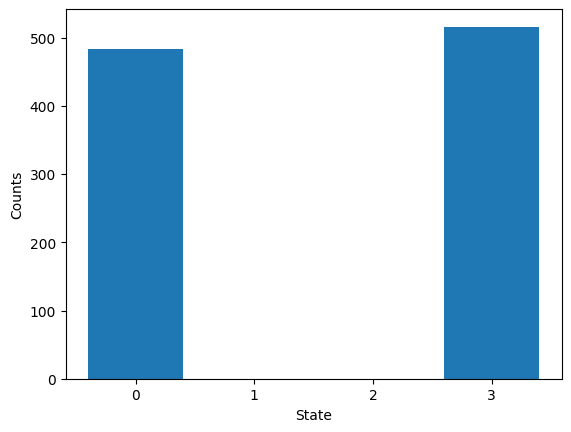

In [4]:
n_measures=1000
sol=np.zeros(n_measures)
for i in range(1000):
    reg=quantum_reg(2)
    reg.h(0)
    for j in range(reg.length-1):
        reg.cx(j,j+1)
    qb0=reg.measure(0)
    qb1=reg.measure(1)
    sol[i]=int(''.join(np.array([qb1,qb0],dtype=str).tolist()), 2)
    
labels, counts = np.unique(sol, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xticks(np.arange(0,2**2));
plt.ylabel('Counts')
plt.xlabel('State')
plt.show()


## Other Quantum Gates

In [5]:
def toffoli(reg:quantum_reg,c1:int,c2:int,t:int):
    matrix=np.diag(np.ones(2**reg.length))
    matrix=matrix.dot(reg.h(t))
    matrix=matrix.dot(reg.cx(c2,t))
    matrix=matrix.dot(reg.t(t,1))
    matrix=matrix.dot(reg.cx(c1,t))
    matrix=matrix.dot(reg.t(t))
    matrix=matrix.dot(reg.cx(c2,t))
    matrix=matrix.dot(reg.t(t,1))
    matrix=matrix.dot(reg.cx(c1,t))
    matrix=matrix.dot(reg.t(t))
    matrix=matrix.dot(reg.t(c2))
    matrix=matrix.dot(reg.cx(c1,c2))
    matrix=matrix.dot(reg.h(t))
    matrix=matrix.dot(reg.t(c2,1))
    matrix=matrix.dot(reg.t(c1))
    matrix=matrix.dot(reg.cx(c1,c2))
    
    return matrix

def ccz(reg:quantum_reg, control1:int,control2:int, target:int):
    matrix=reg.cx(control1,target)
    matrix=matrix.dot(reg.t(target,1))
    matrix=matrix.dot(reg.cx(control2,target))
    matrix=matrix.dot(reg.t(target))
    matrix=matrix.dot(reg.cx(control1,target))
    matrix=matrix.dot(reg.t(target,1))
    matrix=matrix.dot(reg.cx(control2,target))
    matrix=matrix.dot(reg.t(target))
    matrix=matrix.dot(reg.t(control1))
    matrix=matrix.dot(reg.cx(control2,control1))
    matrix=matrix.dot(reg.t(control1,1))
    matrix=matrix.dot(reg.cx(control2,control1))
    matrix=matrix.dot(reg.t(control2))
    
    return matrix

def cccz(reg:quantum_reg, control1:int,control2:int,control3:int, target:int):
    theta=np.pi/8
    #--------------------------#
    matrix=reg.p(control1,theta)
    
    #--------------------------------#
    matrix=matrix.dot(reg.cx(control1,control2))
    matrix=matrix.dot(reg.p(control2,theta,1))
    matrix=matrix.dot(reg.cx(control1,control2))
    matrix=matrix.dot(reg.p(control2,theta))
    #--------------------------------#
    matrix=matrix.dot(reg.cx(control2,control3))
    matrix=matrix.dot(reg.p(control3,theta,1))
    matrix=matrix.dot(reg.cx(control1,control3))
    matrix=matrix.dot(reg.p(control2,theta,0))
    matrix=matrix.dot(reg.cx(control2,control3))
    matrix=matrix.dot(reg.p(control3,theta,1))
    matrix=matrix.dot(reg.cx(control1,control3))
    matrix=matrix.dot(reg.p(control2,theta,0))
    
    #---------------------------------#    
    matrix=matrix.dot(reg.cx(control3,target))
    matrix=matrix.dot(reg.p(target,theta,1))
    matrix=matrix.dot(reg.cx(control1,target))    
    matrix=matrix.dot(reg.p(target,theta))
    matrix=matrix.dot(reg.cx(control2,target))  
    matrix=matrix.dot(reg.p(target,theta,1)) 
    matrix=matrix.dot(reg.cx(control1,target))
    matrix=matrix.dot(reg.p(target,theta))
    
    matrix=matrix.dot(reg.cx(control3,target))
    matrix=matrix.dot(reg.p(target,theta,1))
    matrix=matrix.dot(reg.cx(control1,target))    
    matrix=matrix.dot(reg.p(target,theta))
    matrix=matrix.dot(reg.cx(control2,target))  
    matrix=matrix.dot(reg.p(target,theta,1)) 
    matrix=matrix.dot(reg.cx(control1,target))
    matrix=matrix.dot(reg.p(target,theta))
    
    return matrix

def FADDa(reg:quantum_reg, a:int):
    n=reg.length
    conj=0
    if a<0:conj=1;a=np.abs(a)
    binary=np.flip(np.asarray([*(format(a, 'b').zfill(n))],dtype=int));
    matrix=np.diag(np.ones(2**n))
    for i in range(n):
        for j in range(n-i):
            if binary[j]==1:
                matrix=matrix.dot(reg.p(i,2*np.pi/(2**(n-i-j)),conj));            
    return matrix

# Grover's Algorithm Implementation 


In [6]:

#grover_oracle_2qbit: method that applies an oracle to a given quantum register for a certain specified state.
# This method applies a grover's oracle to a 2 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
# state: List of string with the states which want to be found with grover's algorithm. 
# return: an array with the matrix corresponding to the grover's oracle gate matrix representation.

def grover_oracle_2qbit(reg:quantum_reg,states:list):
    matrix=np.diag([1,1,1,1])
    for state in states:
        binary=np.array([*(state)],dtype=int)
        positions=np.where(binary==0)[0];
        for i in range(0,np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
        matrix=matrix.dot(reg.cz(0,1))
        for i in range(np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
    
    return matrix

#grover_amplification_2qbit: method that applies a  grover's amplification matrix to a given 2 qbit quantum register for a certain specified state.
# This method applies a grover's amplification gate to a 2 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
# return: an array with the matrix corresponding to the grover's amplification gate matrix representation.

def grover_amplification_2qbit(reg:quantum_reg):
    matrix=np.diag([1,1,1,1])
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
        
    matrix=matrix.dot(reg.cz(1,0))
    
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
        
    return matrix 


In [7]:

#grover_oracle_3qbit: method that applies an oracle to a given quantum register for a certain specified state.
# This method applies a grover's oracle to a 3 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
# state: List of string with the states which want to be found with grover's algorithm. 
# return: an array with the matrix corresponding to the grover's oracle gate matrix representation.
def grover_oracle_3qbit(reg:quantum_reg,values:list):
    matrix=np.diag(np.ones(2**3))
    for state in values:
        binary=np.array([*(state)],dtype=int)
        positions=np.where(binary==0)[0];
        for i in range(0,np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
        matrix=matrix.dot(ccz(reg,2,1,0))
        for i in range(np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
    
    return matrix

#grover_amplification_3qbit: method that applies a  grover's amplification matrix to a given 3 qbit quantum register for a certain specified state.
# This method applies a grover's amplification gate to a 3 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
# return: an array with the matrix corresponding to the grover's amplification gate matrix representation.
def grover_amplification_3qbit(reg:quantum_reg):
    matrix=np.diag(np.ones(2**3))
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
        
    matrix=matrix.dot(ccz(reg,2,1,0))
    
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
        
    return matrix 

In [8]:
#grover_oracle_4qbit: method that applies an oracle to a given quantum register for a certain specified state.
# This method applies a grover's oracle to a 4 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's oracle matrix is going to be applied (type:quantum_reg)
# state: List of string with the states which want to be found with grover's algorithm. 
# return: an array with the matrix corresponding to the grover's oracle gate matrix representation.
def grover_oracle_4qbit(reg:quantum_reg,values:list):
    matrix=np.diag(np.ones(2**4))
    for state in values:
        binary=np.array([*(state)],dtype=int)
        positions=np.where(binary==0)[0];
        for i in range(0,np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
        matrix=matrix.dot(cccz(reg,3,2,1,0))
        #matrix=matrix.dot(cnz(reg,[3,2,1],0))
        
        for i in range(np.size(positions)):
            pos=(np.size(binary)-1)-positions[i]
            matrix=matrix.dot(reg.x(pos))
    
    return matrix

#grover_amplification_4qbit: method that applies a  grover's amplification matrix to a given 4 qbit quantum register for a certain specified state.
# This method applies a grover's amplification gate to a 4 qbit quantum register.
# Parameters:
# reg: quantum register to which the grover's amplification matrix is going to be applied (type:quantum_reg)
# return: an array with the matrix corresponding to the grover's amplification gate matrix representation.
def grover_amplification_4qbit(reg:quantum_reg):
    matrix=np.diag(np.ones(2**4))
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
        
    matrix=matrix.dot(cccz(reg,3,2,1,0))
    #matrix=matrix.dot(cnz(reg,[3,2,1],0))
    for qb in range(reg.length):
        matrix=matrix.dot(reg.x(qb));
    for qb in range(reg.length):
        matrix=matrix.dot(reg.h(qb));
        
    return matrix 

## Example 1: Grover's Algortihm 4 Qbit System 

In this example Grover's Algorithm is applied to a 4 qbit system, looking for the state $|1100\rangle$

In [9]:
reg=quantum_reg(4)
reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [10]:
for qb in range(reg.length):
    reg.h(qb);

reg.tensor

array([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])

In [11]:
grover_oracle_4qbit(reg,['1100'])
reg.tensor

array([ 0.1767767 -1.76776695e-01j,  0.1767767 -1.76776695e-01j,
        0.25      +0.00000000e+00j,  0.25      +0.00000000e+00j,
        0.23096988+9.56708581e-02j,  0.23096988+9.56708581e-02j,
        0.23096988+9.56708581e-02j,  0.23096988+9.56708581e-02j,
        0.23096988-9.56708581e-02j,  0.23096988-9.56708581e-02j,
        0.23096988-9.56708581e-02j,  0.23096988-9.56708581e-02j,
       -0.25      -8.63614149e-18j,  0.25      -3.06161700e-17j,
        0.1767767 +1.76776695e-01j,  0.1767767 +1.76776695e-01j])

In [12]:
grover_amplification_4qbit(reg)
reg.tensor

array([-0.1875    -1.50888348e-01j, -0.20508154-1.50888348e-01j,
       -0.19993202+8.83883476e-02j, -0.19993202+1.07943857e-16j,
       -0.08838835+8.83883476e-02j, -0.08838835+8.11058372e-02j,
       -0.1875    +8.32388351e-02j, -0.15088835+8.32388351e-02j,
       -0.15603786-2.51708718e-01j, -0.15603786-6.76495125e-02j,
       -0.25514951-1.21559206e-01j, -0.21853786-1.21559206e-01j,
       -0.50856695+1.24320230e-02j, -0.06420872+1.24320230e-02j,
       -0.19435823+2.51708718e-01j, -0.19435823+1.63320371e-01j])

In [13]:
grover_oracle_4qbit(reg,['1100'])
reg.tensor

array([-0.2392767 +2.58883476e-02j, -0.25170872+3.83203706e-02j,
       -0.19993202+8.83883476e-02j, -0.19993202+1.07943857e-16j,
       -0.11548494+4.78354290e-02j, -0.11269805+4.11072667e-02j,
       -0.20508154+5.14951252e-03j, -0.17125678+1.91601853e-02j,
       -0.24048494-1.72835429e-01j, -0.17004853-2.78689609e-03j,
       -0.28224611-1.46645710e-02j, -0.24842135-2.86752437e-02j,
        0.50856695-1.24320230e-02j, -0.06420872+1.24320230e-02j,
       -0.31541696+4.05529186e-02j, -0.25291696-2.19470814e-02j])

In [14]:
grover_amplification_4qbit(reg)
reg.tensor

array([0.05652013+0.06665341j, 0.04884563+0.06577911j,
       0.12768083-0.05920095j, 0.13207621-0.00818664j,
       0.1767626 +0.04050314j, 0.17712474+0.00930292j,
       0.11340824-0.00818664j, 0.15992693-0.00636602j,
       0.07594223+0.12281723j, 0.13404684+0.04050314j,
       0.0604233 -0.07068664j, 0.09703495-0.07083665j,
       0.83188464-0.01658543j, 0.23887061+0.01991431j,
       0.02856917-0.13292473j, 0.10143033-0.05799271j])

In [15]:
grover_oracle_4qbit(reg,['1100'])
reg.tensor

array([ 0.08709684+0.00716531j,  0.08105193+0.01197378j,
        0.12768083-0.05920095j,  0.13207621-0.00818664j,
        0.14780746+0.10506414j,  0.16008185+0.07637748j,
        0.10790844+0.03583598j,  0.15018939+0.05531995j,
        0.11716159+0.08440649j,  0.13934302-0.01387748j,
        0.02877324-0.08842894j,  0.06254059-0.1025782j ,
       -0.83188464+0.01658543j,  0.23887061+0.01991431j,
        0.11419343-0.07379052j,  0.11272911+0.03071504j])

In [16]:
grover_amplification_4qbit(reg)
reg.tensor

array([-0.06624465-2.81737745e-04j, -0.06707852+7.94240824e-03j,
       -0.0033752 +1.22658737e-01j, -0.00283449-1.81193586e-02j,
        0.01130418+8.85205005e-02j,  0.02086874+4.66054555e-02j,
       -0.02738787+2.30327487e-02j,  0.04725952+3.69902164e-02j,
       -0.02061384-2.82243671e-01j, -0.00133015+2.36153386e-02j,
       -0.09491607-9.69344684e-02j, -0.04860444-1.16292469e-01j,
       -0.90736749-3.30635233e-03j,  0.11326601+7.34209990e-03j,
        0.03171821+7.88960018e-02j,  0.03971613-1.57206310e-02j])

## Example 2: Grover's Algortihm 2 Qbit System 

In this example Grover's Algorithm is applied to a 2 qbit system, looking for the state $|10\rangle$

In [17]:
reg=quantum_reg(2)
reg.tensor

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [18]:
for qb in range(reg.length):
    reg.h(qb);

reg.tensor

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [19]:
grover_oracle_2qbit(reg,['10'])
reg.tensor

array([ 0.5+0.000000e+00j,  0.5+0.000000e+00j, -0.5+6.123234e-17j,
        0.5-6.123234e-17j])

In [20]:
grover_amplification_2qbit(reg)
reg.tensor

array([ 0.+6.1232340e-17j,  0.+0.0000000e+00j, -1.+3.0616170e-16j,
        0.-1.2246468e-16j])

## Example 3: Grover's Algortihm 3 Qbit System 

In this example Grover's Algorithm is applied to a 3 qbit system, looking for the state $|101\rangle$

In [21]:
reg=quantum_reg(3)
for qb in range(reg.length):
    reg.h(qb);
print(reg.tensor)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


In [22]:
grover_oracle_3qbit(reg,['101']);
print(reg.tensor)

[ 0.35355339-6.79815537e-33j  0.35355339+0.00000000e+00j
  0.35355339+6.79815537e-33j  0.35355339+0.00000000e+00j
  0.35355339+0.00000000e+00j -0.35355339+4.32978028e-17j
  0.35355339+0.00000000e+00j  0.35355339-4.32978028e-17j]


In [23]:
grover_amplification_3qbit(reg)
reg.tensor

array([-0.1767767 +1.20791053e-16j, -0.1767767 +7.74932501e-17j,
       -0.1767767 +7.74932501e-17j, -0.1767767 +4.63319213e-17j,
       -0.1767767 +7.74932501e-17j, -0.88388348+4.55037001e-16j,
       -0.1767767 +4.63319213e-17j, -0.1767767 +3.03411851e-18j])

In [24]:
grover_oracle_3qbit(reg,['101'])
reg.tensor

array([-0.1767767 +1.11022302e-16j, -0.1767767 +8.32667268e-17j,
       -0.1767767 +7.74932501e-17j, -0.1767767 +2.77555756e-17j,
       -0.1767767 +6.93889390e-17j,  0.88388348-5.09035914e-16j,
       -0.1767767 +4.16333634e-17j, -0.1767767 +3.71911286e-17j])

In [25]:
grover_amplification_3qbit(reg)
reg.tensor

array([-0.08838835+1.55530891e-16j, -0.08838835+1.25153201e-16j,
       -0.08838835+1.25153201e-16j, -0.08838835+9.86751697e-17j,
       -0.08838835+1.25153201e-16j,  0.97227182-9.46157877e-16j,
       -0.08838835+9.86751697e-17j, -0.08838835+1.46802102e-16j])

# Shors Algorithm

The following methods implements Shors Algorithm. It takes an integer N as an input and gives its factors as an output. The way the factors are found its by etermining the period of a function $f=a^x modN$. This is done quantically through applying a gate  $U_j=a^{2^j} modN$ to a certain input qbit and measuring the output qbits. 

In [5]:
def gcd(a, b):
    while b != 0:
        t = copy.copy(b)
        b = a% b
        a = copy.copy(t)
    return a 

def U(a:int,N:int,reg:quantum_reg,counting_qb:int):
    repetitions=1;
    matrix=np.diag(np.ones(2**reg.length))
    for i in range(counting_qb):
        for j in range(repetitions):
            matrix=matrix.dot(reg.cp(counting_qb,i,2*np.pi*a/((2**j)*N)));
        repetitions*=2  
    return matrix


#Shors: method that applies shors algorithm to factorize numbers.
# Parameters:
# N: Number which is going to be factorized.
# return: an array with two factors of N. 

def Shors(N):
    
#Choosing a number between 2 and N-1  which is not already a factor of N
    a=np.random.randint(2, N-1)
    while gcd(a,N)!=1:
        a=np.random.randint(2, N-1)
    
#Determining the number of input and output qbits.
    n = int(np.ceil(np.log2(N)))
    m = 1
    
#Determining the number of experiments and measurements which are going to be done    
    measures=[]
    tot_measures=50
    for k in range(tot_measures):  
        
        #Creating the quantum register and applying H gate to the output qbits
        reg=quantum_reg(n+m);
        for i in range(n):
            reg.h(i);
        #Initializing the input qbits in state |1>
        reg.x(n)
    
        #Applying the controlled U^j gate to the input qbit  for each output qbit present.
        U(a,N,reg,n);
        
        #Applying the inverse Quantum Fourier Transform. 
        reg.icft(n);
    
        #Mearusing the state of the output qbits and storing the result
        value=[]
        for i in range(n):
            value.append(reg.measure(i));
        
        measures.append(int(''.join(np.flip(np.array(value,dtype=str).tolist())), 2))
    
    
    #Determining the possible values of r and the possible factors
    labels, counts = np.unique(measures, return_counts=True)      
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.xticks(np.arange(0,2**(n)))
    plt.ylabel('Counts')
    plt.xlabel('State')
    
    
    
    fractions = []
    for i in range(len(labels)):
        if counts[i]> tot_measures*0.1:
            f = Fraction(labels[i]/2**n).limit_denominator(N)
            r= f.denominator
            fraction = gcd(N, int(a**(r/2)) +1)
            fractions.append(fraction)
    
    #Validating the possible factors found and returning the result. 
    r = 0
    evaluations=0
    while r == 0 and evaluations<N:
        a = randint(2, N)
        r = gcd(a, N)
        for i in range(len(fractions)):
            evaluations+=1
            if r != 1 and r != N and r == fractions[i]:
                break
            if i == len(fractions)-1:
                r = 0

    if r < 2 or r == N :
        return "Failed to find factors"
    else:
        return r, N // r


# Example 1: Factorizing 21

(3, 7)

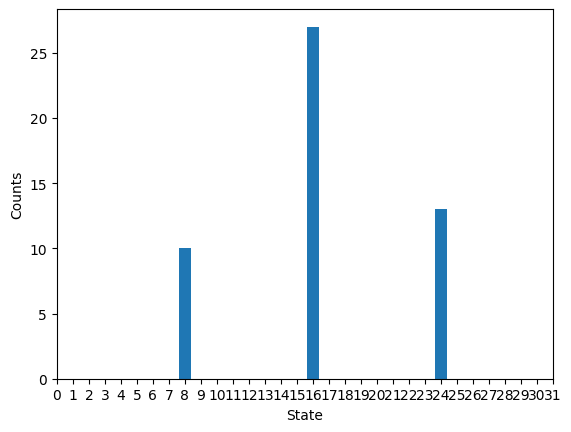

In [8]:
Shors(21)

# Example 2: Factorizing 15

In [32]:
Shors(15)

(3, 5)

### Other Stuff For Later

In [ ]:
def adder(state:quantum_reg,a:int):
    n=2**state.length
    matrix=np.diag(np.ones(n))
    for i in range(n):
        matrix=matrix.dot(state.Rz(i, 2*np.pi*a/(2^(n-i))))
        
    return matrix

In [ ]:
def cnz(reg:quantum_reg,control:list, target:int,conj:int=0):
    
    matrix=np.diag(np.ones(2**reg.length))
    n=len(control)
    theta=np.pi/(2)
    if n>2:
        matrix=matrix.dot(cnz(reg,control[1:],target))
        matrix=matrix.dot(reg.cx(control[0],target))
        matrix=matrix.dot(cnz(reg,control[1:],target,1-conj)) 
        matrix=matrix.dot(reg.cx(control[0],target))
        matrix=matrix.dot(cnz(reg,control[1:],target))   
    else:
        matrix=matrix.dot(reg.cp(control[0],target,theta,conj))
        matrix=matrix.dot(reg.cx(control[-1],control[0]))
        matrix=matrix.dot(reg.cp(control[0],target,theta,1-conj))
        matrix=matrix.dot(reg.cx(control[-1],control[0]))   
        matrix=matrix.dot(reg.cp(control[-1],target,theta,conj))
    return matrix
                      